# Probabilistic Data Structures: Comparative Analysis

This notebook compares three probabilistic data structures implemented from scratch:
- **Bloom Filter**: Set membership testing
- **Count-Min Sketch**: Frequency estimation
- **LogLog**: Cardinality estimation

All implementations use only Python's standard library (no numpy, hashlib, etc.)

In [1]:
import json
import matplotlib.pyplot as plt
from pathlib import Path

# Set up plotting style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [2]:
# Load benchmark results
benchmark_dir = Path('../data/benchmarks')

with open(benchmark_dir / 'comparison.json', 'r') as f:
    comparison = json.load(f)

print("Loaded benchmark results")

Loaded benchmark results


## Comparative Analysis

Direct comparison of all three probabilistic data structures across key metrics.

In [3]:
# Extract comparative data
structures = comparison['structures']

print("\n" + "="*70)
print("COMPARATIVE SUMMARY")
print("="*70)

for struct in structures:
    print(f"\n{struct['name']}:")
    print(f"  Primary Use: {struct['primary_use']}")
    print(f"  Guarantees: {struct['guarantees']}")
    print(f"  Memory: {struct['memory_kb']:.2f} KB")
    print(f"  Insert Throughput: {struct['insert_throughput']:,.0f} ops/sec")
    print(f"  Key Strength: {struct['key_strength']}")
    print(f"  Key Limitation: {struct['key_limitation']}")


COMPARATIVE SUMMARY

Bloom Filter:
  Primary Use: Set membership testing
  Guarantees: No false negatives, tunable false positive rate
  Memory: 0.68 KB
  Insert Throughput: 166,718 ops/sec
  Key Strength: Space-efficient set membership with no false negatives
  Key Limitation: Cannot remove elements, only membership queries

Count-Min Sketch:
  Primary Use: Frequency estimation
  Guarantees: Never underestimates, ε-δ error bounds
  Memory: 5.41 KB
  Insert Throughput: 85,420 ops/sec
  Key Strength: Accurate frequency counts with theoretical error bounds
  Key Limitation: Can overestimate frequencies due to collisions

LogLog:
  Primary Use: Cardinality estimation
  Guarantees: Probabilistic with standard error bounds
  Memory: 16.10 KB
  Insert Throughput: 170,714 ops/sec
  Key Strength: Estimates cardinality in log-log space
  Key Limitation: Higher variance compared to HyperLogLog


Exported to ..\figures\benchmarks\memory_performance_comparison.png


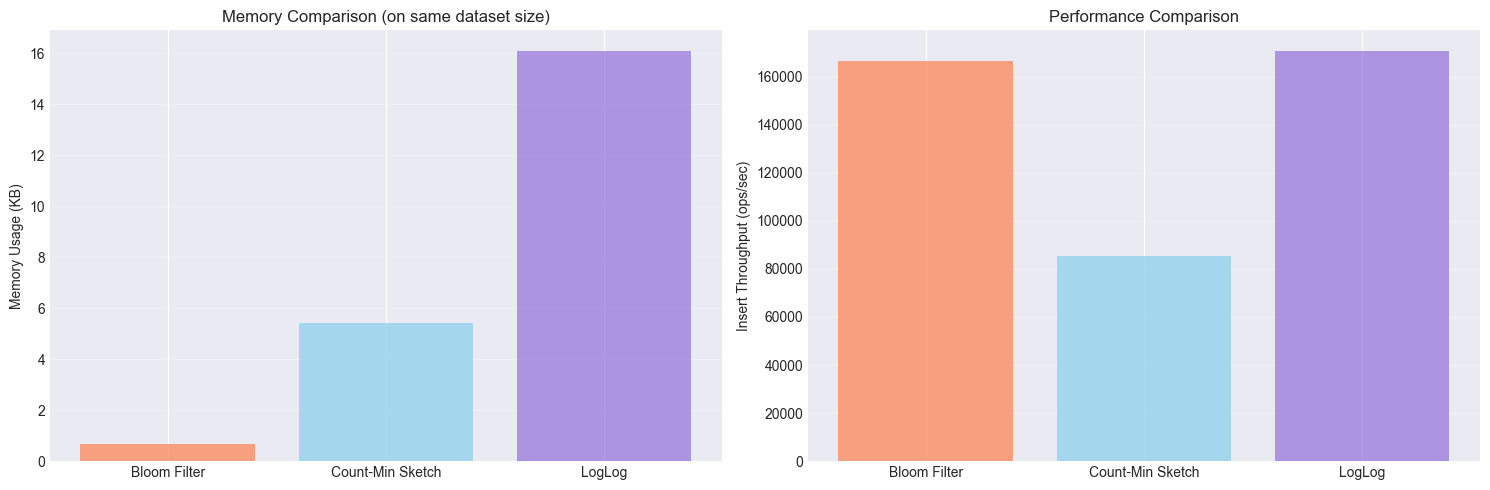

In [4]:
# Plot 1: Memory Efficiency & Performance Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

names = [s['name'] for s in structures]
memory_kb = [s['memory_kb'] for s in structures]
throughput = [s['insert_throughput'] for s in structures]

# Memory comparison
colors = ['coral', 'skyblue', 'mediumpurple']
ax1.bar(names, memory_kb, alpha=0.7, color=colors)
ax1.set_ylabel('Memory Usage (KB)')
ax1.set_title('Memory Comparison (on same dataset size)')
ax1.grid(True, alpha=0.3, axis='y')

# Throughput comparison
ax2.bar(names, throughput, alpha=0.7, color=colors)
ax2.set_ylabel('Insert Throughput (ops/sec)')
ax2.set_title('Performance Comparison')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()

# Export figure
output_dir = Path('../figures/benchmarks')
output_dir.mkdir(parents=True, exist_ok=True)
plt.savefig(output_dir / 'memory_performance_comparison.png', dpi=300, bbox_inches='tight')
print(f"Exported to {output_dir / 'memory_performance_comparison.png'}")

plt.show()

Exported to ..\figures\benchmarks\scalability_analysis.png


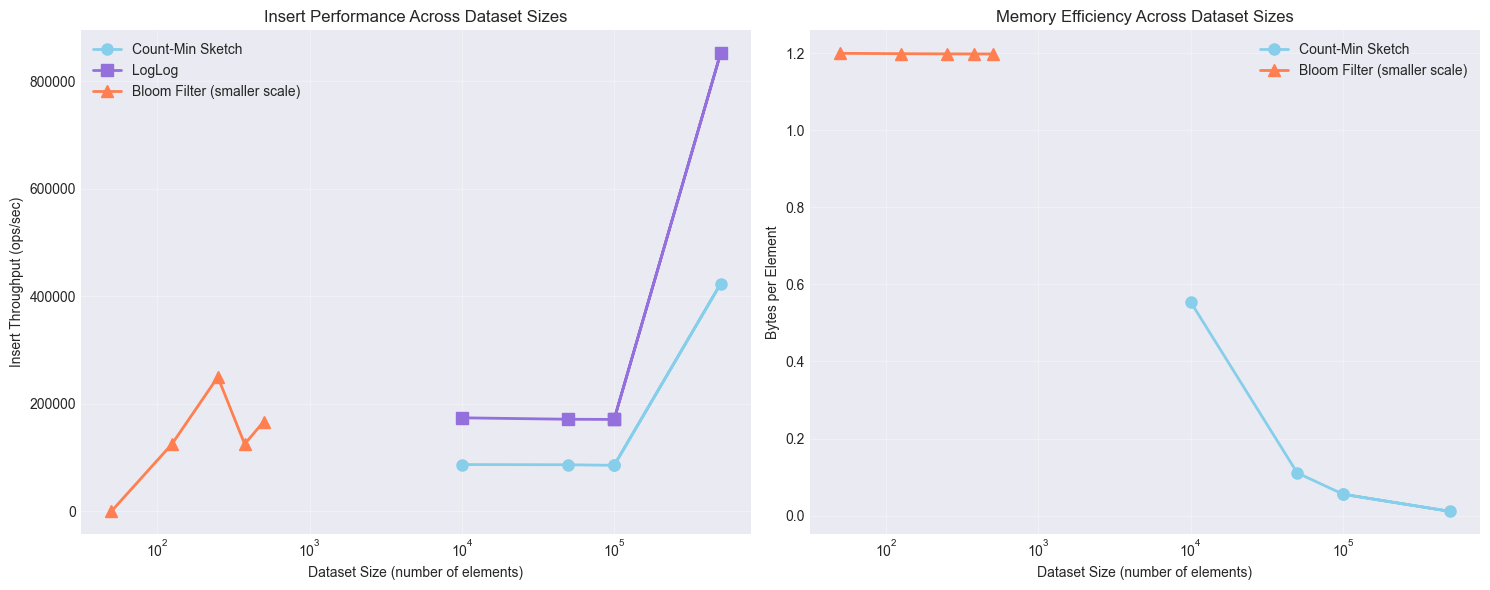

In [5]:
# Plot 2: Scalability Analysis - Performance Across Dataset Sizes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Load individual benchmark results for scalability data
with open(benchmark_dir / 'bloom_filter_results.json', 'r') as f:
    bloom_data = json.load(f)
with open(benchmark_dir / 'count_min_sketch_results.json', 'r') as f:
    cms_data = json.load(f)
with open(benchmark_dir / 'loglog_results.json', 'r') as f:
    loglog_data = json.load(f)

# Extract scalability data
bloom_scalability = [exp for exp in bloom_data['experiments'] if exp['name'] == 'Scalability Analysis'][0]['data']
cms_scalability = [exp for exp in cms_data['experiments'] if exp['name'] == 'Scalability Analysis'][0]['data']
loglog_scalability = [exp for exp in loglog_data['experiments'] if exp['name'] == 'Performance Across Cardinalities'][0]['data']

# Bloom Filter data (smaller scale)
bloom_sizes = [d['dataset_size'] for d in bloom_scalability]
bloom_throughput = [d['insert_throughput'] for d in bloom_scalability]
bloom_bits_per_elem = [d['bits_per_element'] for d in bloom_scalability]

# Count-Min Sketch data
cms_sizes = [d['dataset_size'] for d in cms_scalability]
cms_throughput = [d['insert_throughput'] for d in cms_scalability]
cms_bytes_per_elem = [d['bytes_per_element'] for d in cms_scalability]

# LogLog data
loglog_sizes = [d['dataset_size'] for d in loglog_scalability]
loglog_throughput = [d['insert_throughput'] for d in loglog_scalability]

# Plot 1: Insert Throughput vs Dataset Size
ax1.plot(cms_sizes, cms_throughput, 'o-', label='Count-Min Sketch', color='skyblue', linewidth=2, markersize=8)
ax1.plot(loglog_sizes, loglog_throughput, 's-', label='LogLog', color='mediumpurple', linewidth=2, markersize=8)
ax1.plot(bloom_sizes, bloom_throughput, '^-', label='Bloom Filter (smaller scale)', color='coral', linewidth=2, markersize=8)

ax1.set_xlabel('Dataset Size (number of elements)')
ax1.set_ylabel('Insert Throughput (ops/sec)')
ax1.set_title('Insert Performance Across Dataset Sizes')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xscale('log')

# Plot 2: Memory Efficiency
ax2.plot(cms_sizes, cms_bytes_per_elem, 'o-', label='Count-Min Sketch', color='skyblue', linewidth=2, markersize=8)
ax2.plot(bloom_sizes, [b/8 for b in bloom_bits_per_elem], '^-', label='Bloom Filter (smaller scale)', color='coral', linewidth=2, markersize=8)

ax2.set_xlabel('Dataset Size (number of elements)')
ax2.set_ylabel('Bytes per Element')
ax2.set_title('Memory Efficiency Across Dataset Sizes')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xscale('log')

plt.tight_layout()

# Export figure
output_dir = Path('../figures/benchmarks')
output_dir.mkdir(parents=True, exist_ok=True)
plt.savefig(output_dir / 'scalability_analysis.png', dpi=300, bbox_inches='tight')
print(f"Exported to {output_dir / 'scalability_analysis.png'}")

plt.show()